In [120]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap as lsc

In [3]:
df=pd.read_csv("test_data_2.csv")
df.head()

,movie_id,user_id,rating
0,4500,2532865,4
1,4500,573364,3
2,4500,1696725,3
3,4500,1253431,3
4,4500,1265574,2


In [132]:
titles_df = pd.read_csv("../flask/static/movie_titles.csv",header = None, names = ['movie_id', 'year', 'title'], usecols=[0,1,2],encoding = "ISO-8859-1")
titles_df.head()

,movie_id,year,title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [23]:
def get_compare_counts(df, col1="rating_x", col2="rating_y"):
    df_fill = df.fillna(0)
    output = []
    for i in range(6):
        for j in range(6):
            n = len(df_fill[(df_fill[col1]==i)&(df_fill[col2]==j)])
            output.append([i,j,n])
    return output

In [21]:
def get_compare_counts_df(df, id1, id2):
    df1 = df[df["movie_id"]==id1].drop(["movie_id"],axis=1)
    df2 = df[df["movie_id"]==id2].drop(["movie_id"],axis=1)
    df_join = df1.merge(df2, on="user_id",how="outer")
    
    return get_compare_counts(df_join)

In [4]:
def rough_correl_v1(df, id1, id2):
    c = get_compare_counts_df(df, id1, id2)
    total = sum([x[2] for x in c if x[0]*x[1]>0])
    if total == 0:
        return (0,0)
    pos_c = sum([c[i][2] for i in [7,8,13,14, 28,29,34,35]])
    neg_c = sum([c[i][2] for i in [10,11,16,17, 25,26,31,32]])
    result = (pos_c-neg_c)/total
    return (result, total)

In [94]:
def rough_correl_v1_fast(df, id1, id2, pos_neg=False):
    df1 = df[df["movie_id"]==id1].drop(["movie_id"],axis=1)
    df2 = df[df["movie_id"]==id2].drop(["movie_id"],axis=1)
    df_join = df1.merge(df2, on="user_id",how="inner")
    
    total = len(df_join)
    if total == 0:
        return (0,0,0) if pos_neg else (0,0)
    
    rx = df_join["rating_x"]
    ry = df_join["rating_y"]
    pos_c = len(df_join[((rx>3)&(ry>3))|((rx<3)&(ry<3))])
    neg_c = len(df_join[((rx>3)&(ry<3))|((rx<3)&(ry>3))])
    if pos_neg:
        return (pos_c/total,neg_c/total,total)
    result = (pos_c-neg_c)/total
    return (result, total)

In [96]:
rough_correl_v1_fast(df, 4656,4641)

(0.18003913894324852, 2044)

In [133]:
def get_title(df, movie_id):
    return df[df.movie_id==movie_id].iloc[0].title

In [162]:
def plot_compare1(df, id1, id2, title_ref=None, labels=False):
    plt.figure(figsize=(6,6))
    
    comp_c = get_compare_counts_df(df, id1,id2)
    
    count_nz=[x for x in comp_c if x[0]*x[1]>0]
    count_na=[x for x in comp_c if x[0]*x[1]==0]
    
    [x1_nz, x2_nz, n_nz] = list(zip(*count_nz))
    [x1_na, x2_na, n_na] = list(zip(*count_na))
    
    cmap_na = lsc.from_list("", ["white","red"])
    cmap_nz = lsc.from_list("", ["white",(.2,.4,.9,1)])
    
    max_na = max(n_na+(1,))
    max_nz = max(n_nz+(1,))
    
    plt.scatter(x1_na,x2_na,c=[x/max_na for x in n_na],cmap=cmap_na,marker="s",s=2500)
    plt.scatter(x1_nz,x2_nz,c=[x/max_nz for x in n_nz],cmap=cmap_nz,marker="s",s=2500)
    
    if title_ref is not None:
        plt.xlabel(get_title(title_ref, id1))
        plt.ylabel(get_title(title_ref, id2))
    
    if labels:
        for i in range(len(x1_na)):
            plt.scatter(x1_na[i],x2_na[i],c="black",marker=f"${n_na[i]}$" if n_na[i]>0 else "",s=800,alpha=0.8)
        for i in range(len(x1_nz)):
            plt.scatter(x1_nz[i],x2_nz[i],c="black",marker=f"${n_nz[i]}$" if n_nz[i]>0 else "",s=800,alpha=0.8)

    plt.xlim(-0.5,5.5)
    plt.ylim(-0.5,5.5)
    plt.show()
    
    print(f"Max Red: {max_na}\nMax Blue: {max_nz}")

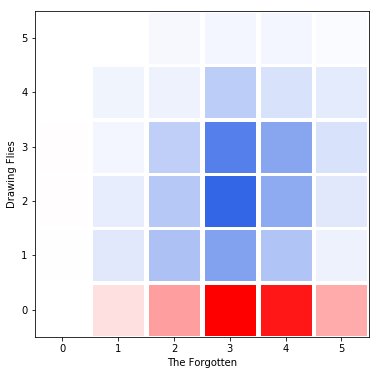

Max Red: 28483
Max Blue: 67


In [139]:
plot_compare1(df, 4590,4621, titles_df)

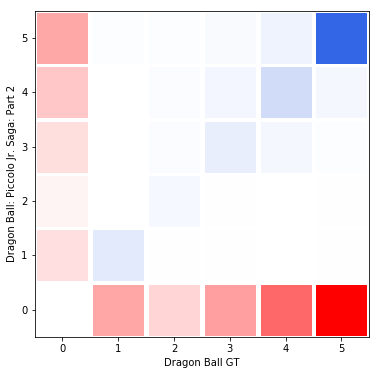

Max Red: 424
Max Blue: 233


In [140]:
plot_compare1(df, 4595,4626, titles_df)

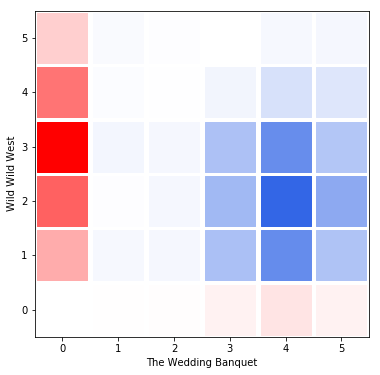

Max Red: 18098
Max Blue: 153


In [159]:
plot_compare1(df, 4663,4670, titles_df)

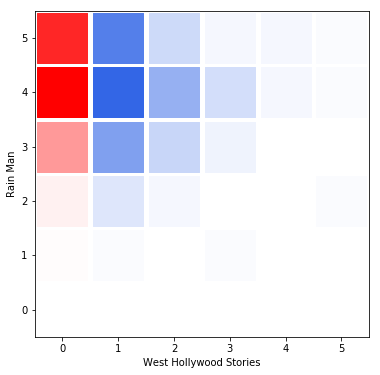

Max Red: 52511
Max Blue: 37


In [180]:
plot_compare1(df, 4625,4640, titles_df)

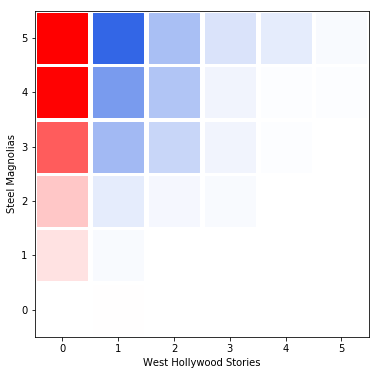

Max Red: 35797
Max Blue: 55


In [266]:
plot_compare1(df, 4625,4577, titles_df)

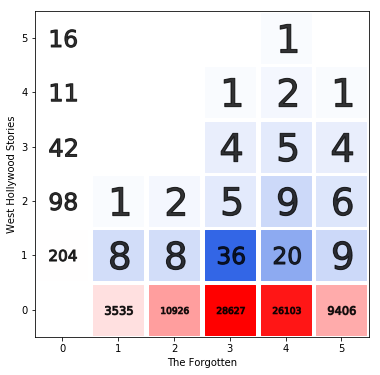

Max Red: 28627
Max Blue: 36


In [163]:
plot_compare1(df, 4590,4625, titles_df,True)

In [28]:
df["movie_id"].value_counts()

4656    130782
4640    122158
4577    106291
4590     78719
4545     70799
4661     51392
4670     49457
4633     41850
4506     33731
4520     26500
4660     25232
4546     23270
4570     20703
4652     14966
4586     14888
4612     12453
4628      8519
4517      8440
4669      6989
4533      6857
4627      6432
4634      6409
4557      6294
4565      5979
4508      5939
4524      5792
4658      5741
4522      5736
4591      5246
4568      5174
         ...  
4611       142
4597       136
4514       131
4642       130
4603       130
4589       129
4540       125
4560       124
4538       124
4576       122
4539       122
4510       119
4604       119
4593       119
4620       117
4542       116
4526       116
4664       113
4502       104
4571       104
4637        97
4619        95
4567        92
4573        92
4532        88
4665        87
4584        68
4574        62
4605        59
4614        33
Name: movie_id, Length: 171, dtype: int64

In [19]:
max_id = max(df["movie_id"])
min_id = min(df["movie_id"])

In [63]:
x_vals = []
y_vals = []
c_vals = []

counter = 0

for i in range(min_id,max_id):
    for j in range(i+1,max_id+1):
        if counter%100 == 0:
            print(f"{counter} records complete...")
        x_vals.append(i)
        y_vals.append(j)
        (corr,total)=rough_correl_v1_fast(df, i, j)
        c_vals.append([max(corr,0),min(total/256,1),abs(min(corr,0))])
        counter += 1

0 records complete...
100 records complete...
200 records complete...
300 records complete...
400 records complete...
500 records complete...
600 records complete...
700 records complete...
800 records complete...
900 records complete...
1000 records complete...
1100 records complete...
1200 records complete...
1300 records complete...
1400 records complete...
1500 records complete...
1600 records complete...
1700 records complete...
1800 records complete...
1900 records complete...
2000 records complete...
2100 records complete...
2200 records complete...
2300 records complete...
2400 records complete...
2500 records complete...
2600 records complete...
2700 records complete...
2800 records complete...
2900 records complete...
3000 records complete...
3100 records complete...
3200 records complete...
3300 records complete...
3400 records complete...
3500 records complete...
3600 records complete...
3700 records complete...
3800 records complete...
3900 records complete...
4000 records

[]

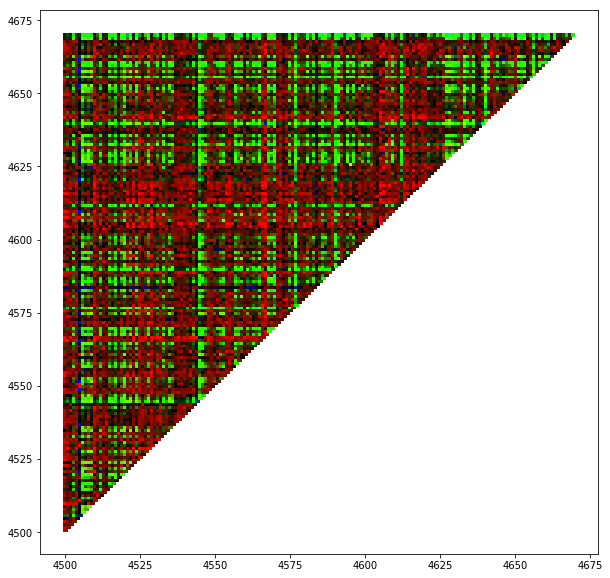

In [179]:
plt.figure(figsize=[10,10])
no_green = [[x[0],0,x[2]] for x in c_vals]
dark_green = [[x[0],x[1]*0.3,x[2]] for x in c_vals]
high_c_vals = [[x[0],0,x[2]] if x[1]>20/256 else x+[0] for x in c_vals]
# plt.scatter(y_vals[:-1], x_vals[:-1], c=np.array(c_vals),s=3)
plt.scatter(x_vals, y_vals, c=np.array(c_vals),s=10,marker="s")
plt.plot()

In [148]:
len(c_vals)

14535

In [97]:
x_vals1 = []
y_vals1 = []
c_vals1 = []

counter = 0

for i in range(min_id,max_id):
    for j in range(i+1,max_id+1):
        if counter%100 == 0:
            print(f"{counter} records complete...")
        x_vals1.append(i)
        y_vals1.append(j)
        (pos,neg,total)=rough_correl_v1_fast(df, i, j,True)
        c_vals1.append([pos,min(total/256,1),neg])
        counter += 1

0 records complete...
100 records complete...
200 records complete...
300 records complete...
400 records complete...
500 records complete...
600 records complete...
700 records complete...
800 records complete...
900 records complete...
1000 records complete...
1100 records complete...
1200 records complete...
1300 records complete...
1400 records complete...
1500 records complete...
1600 records complete...
1700 records complete...
1800 records complete...
1900 records complete...
2000 records complete...
2100 records complete...
2200 records complete...
2300 records complete...
2400 records complete...
2500 records complete...
2600 records complete...
2700 records complete...
2800 records complete...
2900 records complete...
3000 records complete...
3100 records complete...
3200 records complete...
3300 records complete...
3400 records complete...
3500 records complete...
3600 records complete...
3700 records complete...
3800 records complete...
3900 records complete...
4000 records

[]

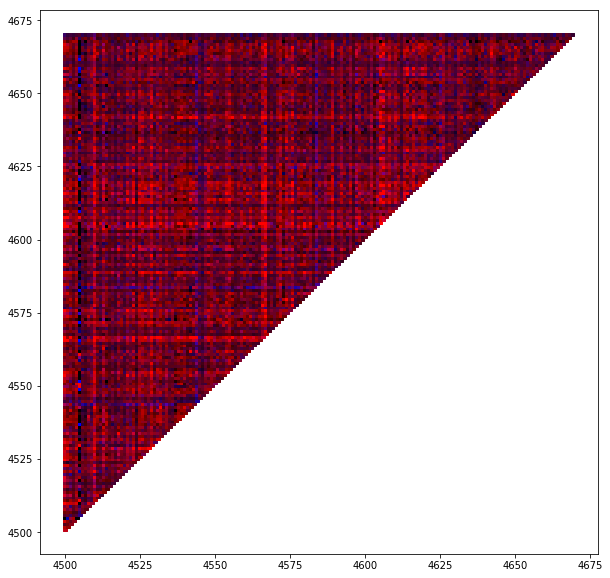

In [178]:
plt.figure(figsize=[10,10])
no_green1 = [[x[0],0,x[2]] for x in c_vals1]
# dark_green = [[x[0],x[1]*0.3,x[2]] for x in c_vals]
# high_c_vals = [[x[0],0,x[2]] if x[1]>20/256 else x+[0] for x in c_vals]

plt.scatter(x_vals1, y_vals1, c=np.array(no_green1),s=10,marker="s")
plt.plot()

In [158]:
# [[x[1]*256,-x[2]] for x in c_vals if x[2]>0.1 and x[1]>.01]
i=0
neg_list=[]
for x in c_vals:
    total=x[1]*256
    neg=x[2]
    if neg>0.3 and total>5:
        neg_list.append([x_vals[i],y_vals[i],total,-neg])
    i+=1
neg_list

[[4502, 4520, 34.0, -0.4117647058823529],
 [4502, 4640, 53.0, -0.33962264150943394],
 [4505, 4506, 28.0, -0.32142857142857145],
 [4505, 4515, 13.0, -0.3076923076923077],
 [4505, 4521, 8.0, -0.625],
 [4505, 4545, 55.0, -0.32727272727272727],
 [4505, 4565, 9.0, -0.3333333333333333],
 [4505, 4627, 10.0, -0.5],
 [4505, 4656, 79.0, -0.3037974683544304],
 [4505, 4658, 8.0, -0.75],
 [4505, 4663, 53.0, -0.33962264150943394],
 [4506, 4544, 48.0, -0.4375],
 [4506, 4556, 49.0, -0.3469387755102041],
 [4506, 4625, 75.0, -0.36],
 [4507, 4544, 17.0, -0.47058823529411764],
 [4507, 4584, 6.0, -0.5],
 [4509, 4544, 11.0, -0.45454545454545453],
 [4509, 4584, 8.0, -0.5],
 [4509, 4625, 13.0, -0.5384615384615384],
 [4513, 4646, 6.0, -0.3333333333333333],
 [4514, 4633, 46.0, -0.32608695652173914],
 [4514, 4640, 51.0, -0.39215686274509803],
 [4520, 4544, 45.0, -0.37777777777777777],
 [4522, 4584, 10.0, -0.4],
 [4524, 4544, 24.0, -0.4166666666666667],
 [4527, 4584, 6.0, -0.5],
 [4531, 4670, 256, -0.327083333333

In [164]:
weights1 = [[x[0]*x[1],0,x[2]*x[1]] for x in c_vals]

[]

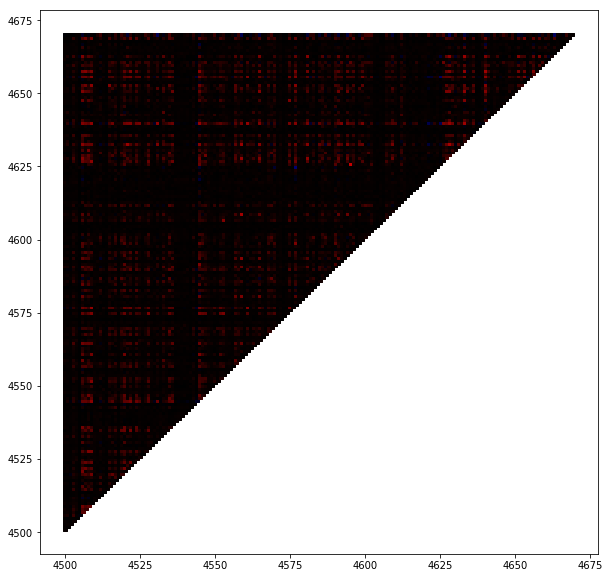

In [177]:
plt.figure(figsize=[10,10])

plt.scatter(x_vals1, y_vals1, c=np.array(weights1),s=10,marker="s")
plt.plot()

In [182]:
avg_ratings=df.groupby("movie_id")["rating"].mean()

In [186]:
avg_ratings.sort_values(ascending=False)

movie_id
4606    4.237500
4633    4.146189
4640    4.125280
4531    4.081783
4509    4.033784
4658    4.016199
4592    4.013333
4628    3.977814
4626    3.976687
4561    3.975752
4521    3.965696
4575    3.960485
4545    3.943968
4506    3.923898
4559    3.914393
4651    3.891344
4585    3.882353
4663    3.877616
4650    3.863158
4577    3.857711
4648    3.840050
4522    3.839784
4595    3.813458
4656    3.813453
4653    3.793714
4525    3.791434
4581    3.775201
4528    3.772039
4508    3.731436
4547    3.728906
          ...   
4639    2.746622
4589    2.728682
4603    2.715385
4539    2.672131
4540    2.656000
4604    2.655462
4537    2.646667
4637    2.618557
4556    2.609756
4622    2.606509
4615    2.568493
4530    2.528796
4532    2.511364
4645    2.500000
4571    2.500000
4611    2.492958
4505    2.470588
4621    2.441030
4582    2.371179
4514    2.358779
4664    2.345133
4538    2.322581
4638    2.228464
4667    2.160839
4502    2.144231
4654    2.000000
4567    1.880435
4584 

In [257]:
x_vals2 = []
y_vals2 = []
c_vals2 = []

max_weight = 0.5

def predict_rating1(user_rating, avg_rating, w):
    return w*(user_rating-3) + (1-abs(w))*(avg_rating-3) + 3
    
for i in range(len(x_vals)):
    x=x_vals[i]
    y=y_vals[i]
    w=weights1[i][0]-weights1[i][2]
    w = min(w/max_weight, 1)
    
    rx = avg_ratings[x]
    ry = avg_ratings[y]
    
    x_vals2 += [x,y]
    y_vals2 += [y,x]
    
    c_vals2 += [[(predict_rating1(j,r,w)-1)/4 for j in [4.5,3,1.5]] for r in [rx,ry]]

In [231]:
c_vals2

[[0.6006540697674418, 0.5772165697674418, 0.5537790697674418],
 [0.5336790966386554, 0.5102415966386554, 0.4868040966386554],
 [0.5937954215116279, 0.5791469840116279, 0.5644985465116279],
 [0.30906325120192313, 0.29441481370192313, 0.27976637620192313],
 [0.5960816375968992, 0.5785035125968992, 0.5609253875968992],
 [0.5684757500702642, 0.5508976250702642, 0.5333195000702642],
 [0.6029402858527132, 0.5765730983527132, 0.5502059108527132],
 [0.5620228160511364, 0.5356556285511364, 0.5092884410511364],
 [0.5823643410852714, 0.5823643410852714, 0.5823643410852714],
 [0.36764705882352944, 0.36764705882352944, 0.36764705882352944],
 [0.6212300145348837, 0.5714253270348837, 0.5216206395348837],
 [0.7501028646219354, 0.7002981771219353, 0.6504934896219353],
 [0.5983678536821706, 0.5778600411821706, 0.5573522286821706],
 [0.6496136270863571, 0.6291058145863571, 0.6085980020863571],
 [0.6120851501937985, 0.5739992126937985, 0.5359132751937985],
 [0.7023733806722512, 0.6642874431722512, 0.62620

[]

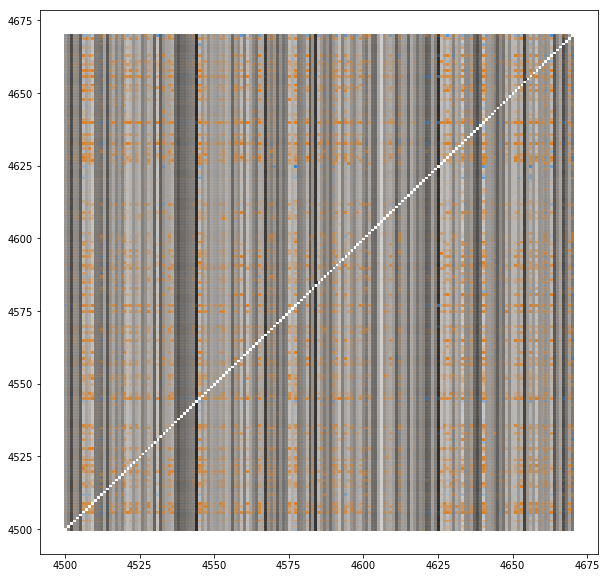

In [258]:
plt.figure(figsize=[10,10])

plt.scatter(x_vals2, y_vals2, c=np.array(c_vals2),s=5,marker="s")
plt.plot()